###CHESS DATASET

Who won the game,who lost(with Logistic Regression)

Errors

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('games.csv')

print("--- Head ---")
print(df.head())
print("\n--- Info ---")
print(df.info())
print("\n--- Describe ---")
print(df.describe())

--- Head ---
         id  rated    created_at  last_move_at  turns victory_status winner  \
0  TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime  white   
1  l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign  black   
2  mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate  white   
3  kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate  white   
4  9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate  white   

  increment_code       white_id  white_rating      black_id  black_rating  \
0           15+2       bourgris          1500          a-00          1191   
1           5+10           a-00          1322     skinnerua          1261   
2           5+10         ischia          1496          a-00          1500   
3           20+0  daniamurashov          1439  adivanov2009          1454   
4           30+3      nik221107          1523  adivanov2009          1469   

                                               mo

Mean: 1596.6318675840064, Std: 291.24611536694346


Text(0.5, 1.0, 'Winner Distribution')

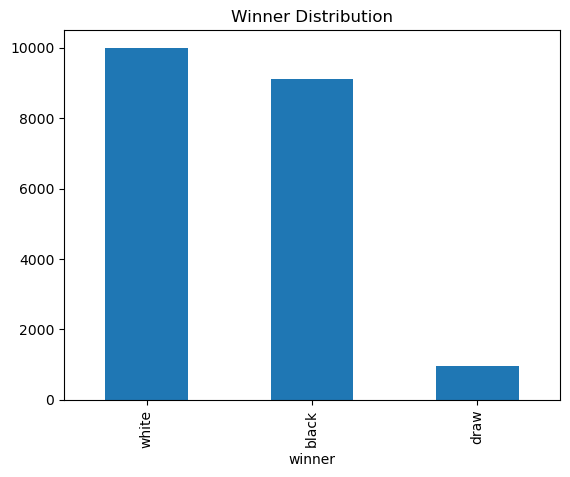

In [67]:
mean_rating=np.mean(df['white_rating'])
std_rating=np.std(df['white_rating'])
print(f"Mean: {mean_rating}, Std: {std_rating}")

df['winner'].value_counts().plot(kind='bar')
plt.title('Winner Distribution')

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Simple ML with Logistic Regression
# Prepare data - using ratings to predict winner
X = df[['white_rating', 'black_rating']]
y = df['winner']

# Handle missing values if any
X = X.fillna(X.mean())
y = y.fillna('draw')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Model accuracy: 0.62

Classification Report:
              precision    recall  f1-score   support

       black       0.62      0.57      0.60      1816
        draw       0.00      0.00      0.00       192
       white       0.62      0.73      0.67      2004

    accuracy                           0.62      4012
   macro avg       0.41      0.43      0.42      4012
weighted avg       0.59      0.62      0.61      4012



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
y_test=np.where(y_test=="white",0,1)
y_pred=np.where(y_pred=="white",0,1)

In [78]:
    # Calculate error metrics



mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  
rmse = np.sqrt(mse)


error_metrics = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse
    }
# Print error metrics
print("\nError Metrics:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
    


Error Metrics:
MSE: 0.3552
MAE: 0.3552
RMSE: 0.5960
